Exploratory Data Analysis и линейная регрессия


### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [17]:
%pip install folium


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

## Часть 0. Подготовка

**Задание 1**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
! pip install -q kaggle
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip
�訡�� � ᨭ⠪�� �������.
"cp" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"chmod" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [21]:
!kaggle competitions download -c nyc-taxi-trip-duration

Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Scripts\kaggle-script.py", line 33, in <module>
    sys.exit(load_entry_point('kaggle==1.5.13', 'console_scripts', 'kaggle')())
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Scripts\kaggle-script.py", line 25, in importlib_load_entry_point
    return next(matches).load()
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\importlib\metadata\__init__.py", line 198, in load
    module = import_module(match.group('module'))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line

In [22]:
!unzip nyc-taxi-trip-duration.zip
!unzip train.zip
!unzip test.zip

"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [23]:
df_train = pd.read_csv('train.csv')
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [24]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train.drop(columns='dropoff_datetime', inplace=True)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 111.3+ MB


In [26]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

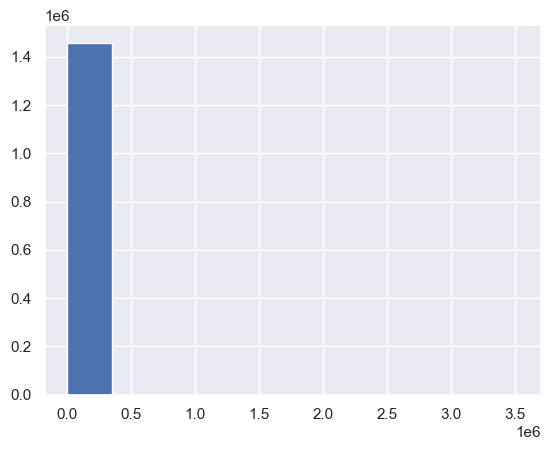

In [27]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(df_train['trip_duration'])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17864\1522874319.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['trip_duration'])


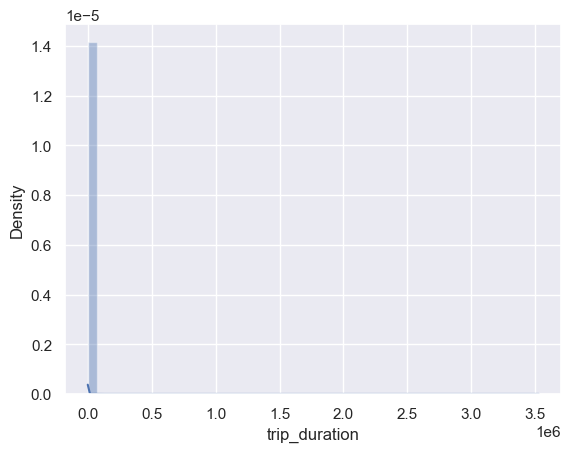

In [28]:
sns.distplot(df_train['trip_duration'])
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

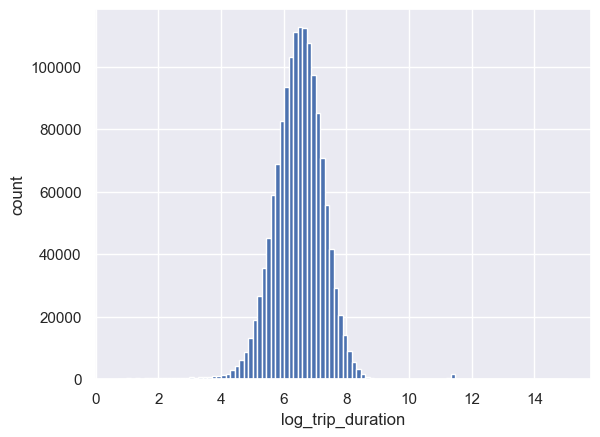

In [29]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['log_trip_duration'] = np.log1p(df_train['trip_duration'].values)
plt.hist(df_train['log_trip_duration'], bins=100)
plt.xlabel('log_trip_duration')
plt.ylabel('count')
plt.show()

In [30]:
# удаляем колонку со старым таргетом так:
df_train.drop(columns=['trip_duration'])

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import math

best_const = math.e**np.mean(np.log(df_train.log_trip_duration))
best_const

6.413305177556131

In [32]:
print('Значение метрики:', np.mean(np.log(df_train['trip_duration'])) - best_const)

Значение метрики: 0.0512159977115445


## Часть 1. Изучаем `pickup_datetime`

**Задание 2**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

Text(0.5, 1.0, 'Rides by Day of Year')

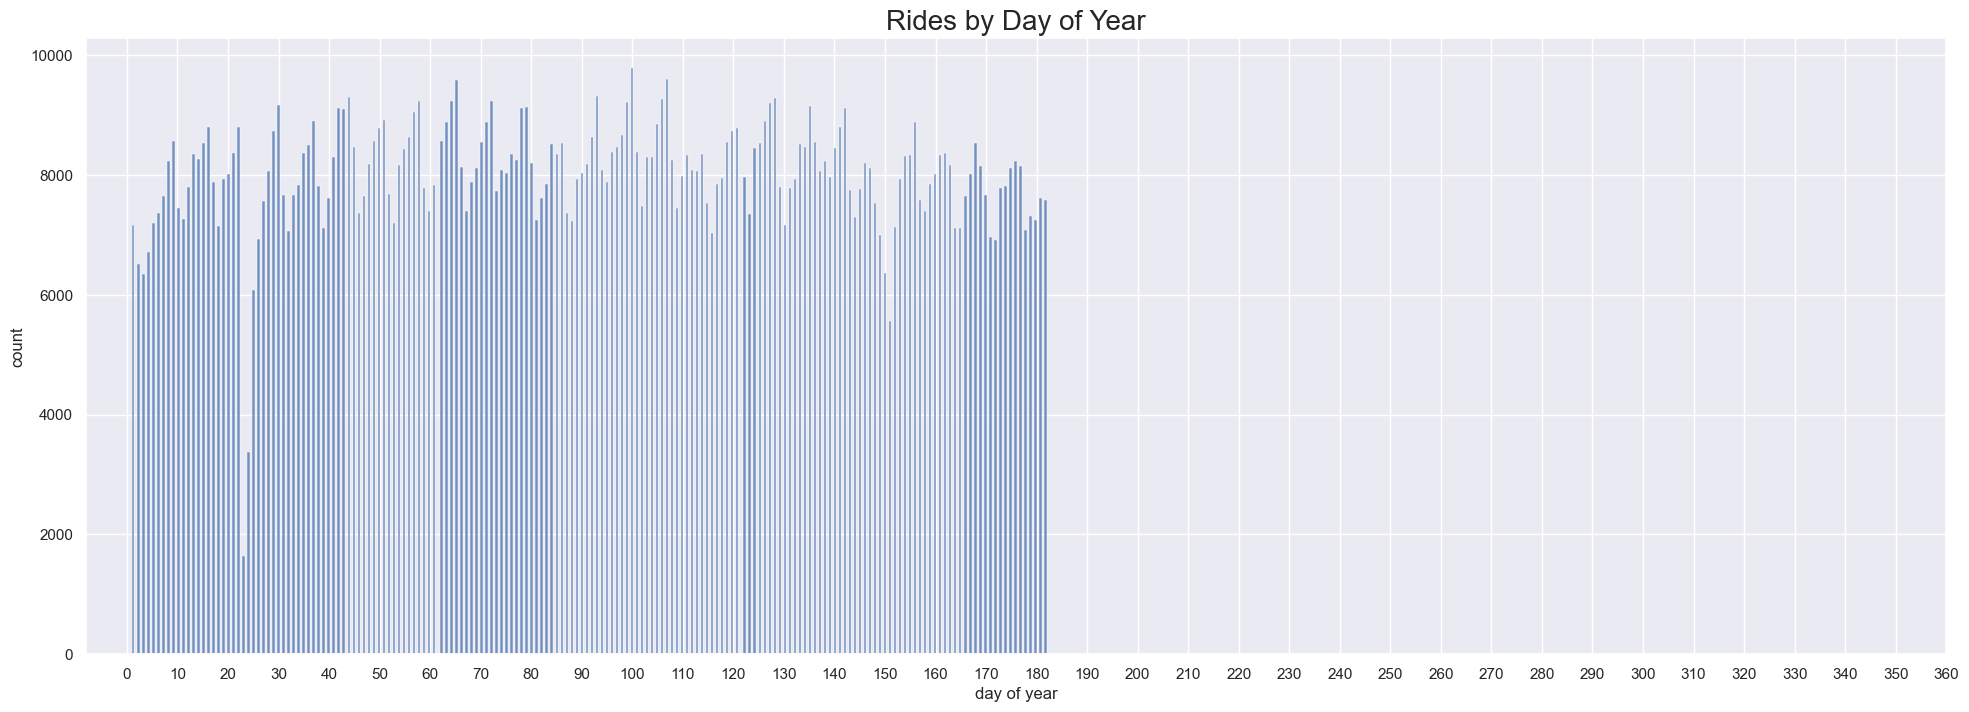

In [33]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(24,8))

x = df_train['pickup_datetime'].dt.dayofyear
sns.histplot(x, bins=365)

plt.xlabel('day of year')
plt.ylabel('count')
plt.xticks(np.arange(0, 366, 10))
plt.title('Rides by Day of Year', fontsize=20)

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [34]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['pickup_datetime'].dt.date.value_counts()[-2:]

2016-01-24    3383
2016-01-23    1648
Name: pickup_datetime, dtype: int64

In [35]:
df_train['pickup_datetime'].dt.date.value_counts()[-3:]

2016-05-30    5570
2016-01-24    3383
2016-01-23    1648
Name: pickup_datetime, dtype: int64

Text(0.5, 1.0, 'dependence')

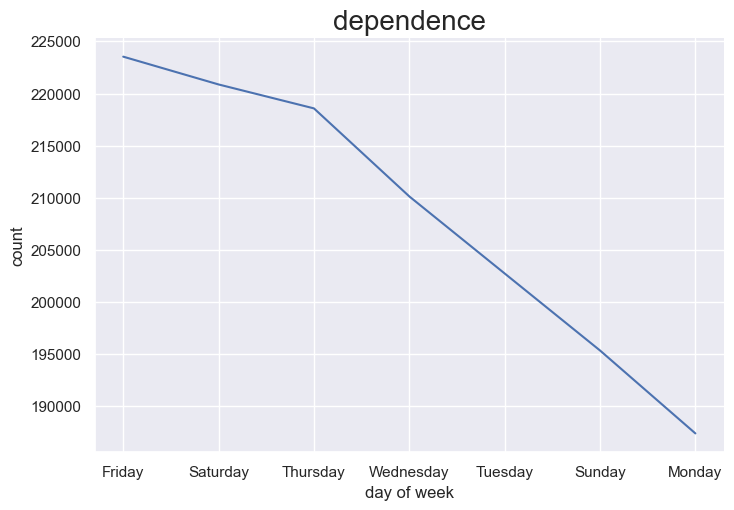

In [38]:
x = df_train['pickup_datetime'].dt.day_name().value_counts().index
y = df_train['pickup_datetime'].dt.day_name().value_counts()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('day of week')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

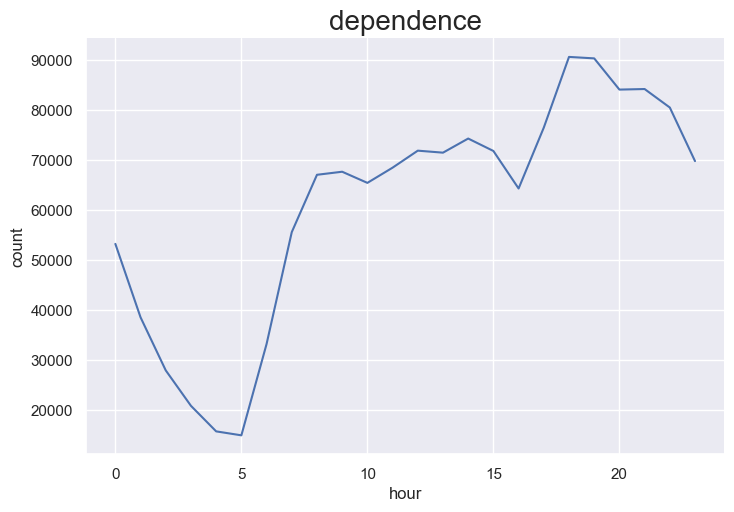

In [37]:
x = df_train['pickup_datetime'].dt.hour.value_counts().index
y = df_train['pickup_datetime'].dt.hour.value_counts()
sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('hour')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

**Задание 3**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# создадим дополнительные столбцы
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['day_of_week'] = df_train['pickup_datetime'].dt.day_name()
df_train['day_of_year'] = df_train['pickup_datetime'].dt.date
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,hour,month,day_of_week,day_of_year
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,3,Monday,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,6,Sunday,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,11,1,Tuesday,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,4,Wednesday,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,3,Saturday,2016-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,13,4,Friday,2016-04-08
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,7,1,Sunday,2016-01-10
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,6,4,Friday,2016-04-22
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,15,1,Tuesday,2016-01-05


In [40]:
tmp = pd.DataFrame(df_train[['month','hour', 'day_of_week']])
tmp

,month,hour,day_of_week
0,3,17,Monday
1,6,0,Sunday
2,1,11,Tuesday
3,4,19,Wednesday
4,3,13,Saturday
...,...,...,...
1458639,4,13,Friday
1458640,1,7,Sunday
1458641,4,6,Friday
1458642,1,15,Tuesday


Text(0.5, 1.0, 'dependence')

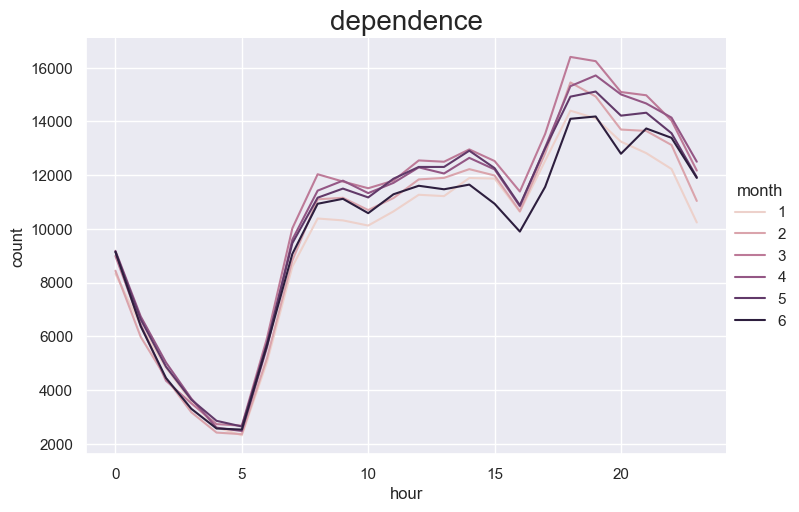

In [46]:
# в этом случае при группировке по месяцу и часу количество одинаковых строк будет записываться в колонку day_of_week
sns.relplot(hue = 'month', x = 'hour', y = 'day_of_week', data = tmp.groupby(['month', 'hour']).count(), kind = 'line', aspect=1.5)

plt.xlabel('hour')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

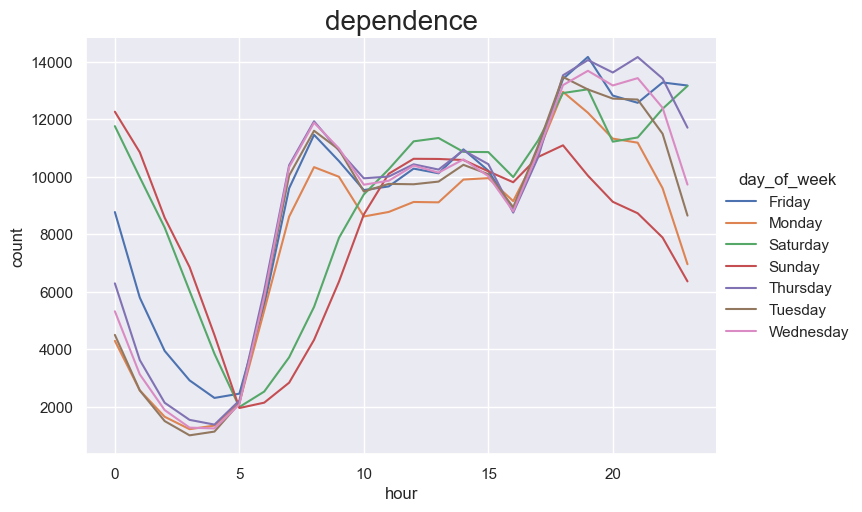

In [47]:
sns.relplot(hue = 'day_of_week', x = 'hour', y = 'month', data = tmp.groupby(['day_of_week', 'hour']).count(), kind = 'line', aspect=1.5)

plt.xlabel('hour')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_train, test_size=0.3)

Text(0.5, 1.0, 'dependence')

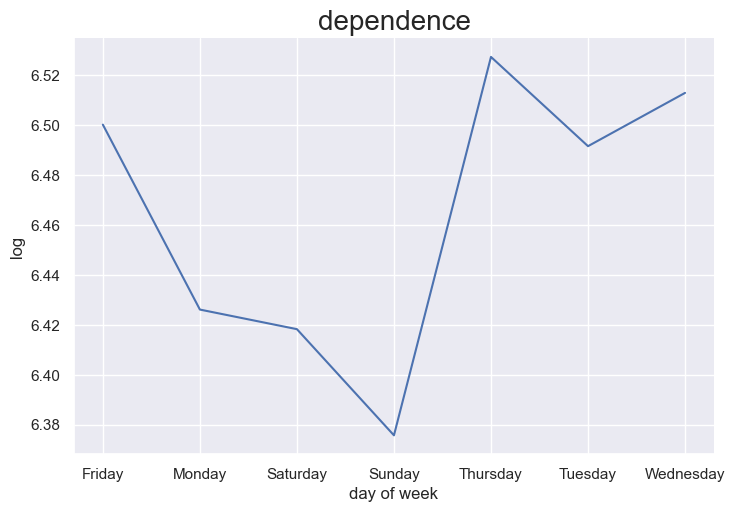

In [49]:
x = train.groupby('day_of_week')['log_trip_duration'].mean().index
y = train.groupby('day_of_week')['log_trip_duration'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind = 'line')

plt.xlabel('day of week')
plt.ylabel('log')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

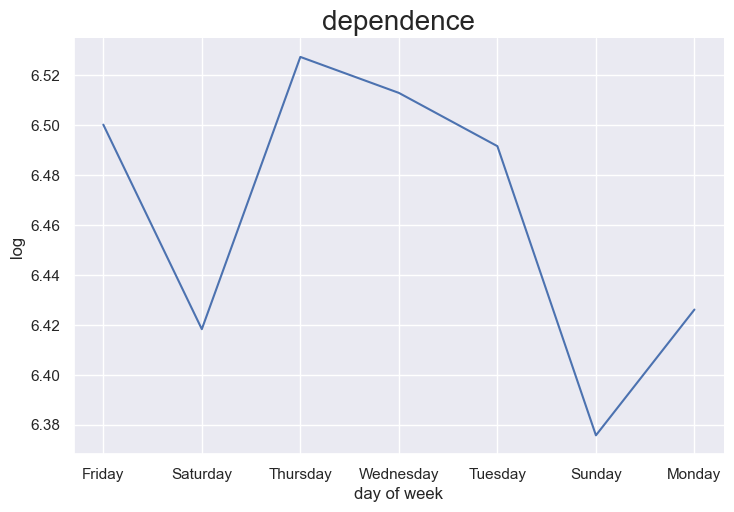

In [50]:
# сделаем так, чтоб дни недели были в том же порядке, что и на прошлых графиках
x = df_train['pickup_datetime'].dt.day_name().value_counts().index
y = list()

for day in df_train['pickup_datetime'].dt.day_name().value_counts().index:
  y.append(train[train['day_of_week'] == day]['log_trip_duration'].mean())

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('day of week')
plt.ylabel('log')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

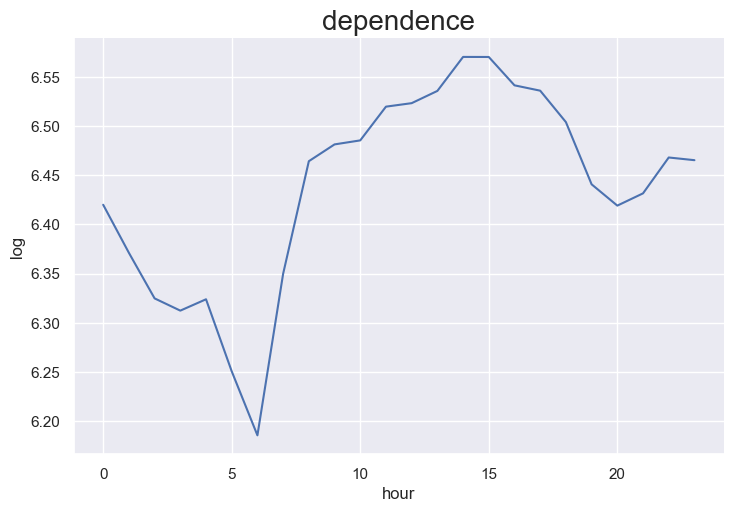

In [51]:
x = train.groupby('hour')['log_trip_duration'].mean().index
y = train.groupby('hour')['log_trip_duration'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('hour')
plt.ylabel('log')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

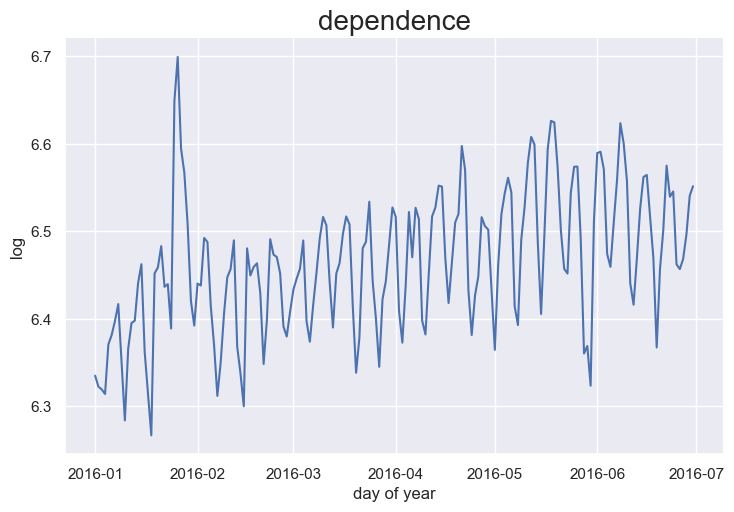

In [52]:
x = train.groupby('day_of_year')['log_trip_duration'].mean().index
y = train.groupby('day_of_year')['log_trip_duration'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('day of year')
plt.ylabel('log')
plt.title('dependence', fontsize=20)

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [53]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['is_bad'] = 0
train.loc[train['pickup_datetime'].dt.date.isin(train['pickup_datetime'].dt.date.value_counts()[-2:].index),'is_bad'] = 1

train['day_of_year'] = train['pickup_datetime'].dt.dayofyear

test['is_bad'] = 0
test.loc[test['pickup_datetime'].dt.date.isin(test['pickup_datetime'].dt.date.value_counts()[-2:].index),'is_bad'] = 1

test['day_of_year'] = test['pickup_datetime'].dt.dayofyear

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Задание 5 **. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [54]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# распишем выборку
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month','is_bad']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month','is_bad']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

## Часть 2. Изучаем координаты 
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [66]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [67]:
show_circles_on_map(df_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [68]:
show_circles_on_map(df_train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Задание 6**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [70]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [73]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['log_haversine'] = np.log1p(haversine_array(train.pickup_longitude, train.pickup_latitude, train.dropoff_longitude, train.dropoff_latitude))
train['haversine'] = haversine_array(train.pickup_longitude, train.pickup_latitude, train.dropoff_longitude, train.dropoff_latitude)

test['log_haversine'] = np.log1p(haversine_array(test.pickup_longitude, test.pickup_latitude, test.dropoff_longitude, test.dropoff_latitude))
test['haversine'] = haversine_array(test.pickup_longitude, test.pickup_latitude, test.dropoff_longitude, test.dropoff_latitude)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [72]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train.loc[:,['log_haversine','log_trip_duration','haversine']].corr().iloc[[0,2],[1]]

,log_trip_duration
log_haversine,0.675873
haversine,0.521313


**Задание 7**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [74]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['velocity'] = (train['haversine']) / (train['trip_duration'])

test['velocity'] = (test['haversine']) / (test['trip_duration'])

(array([1.021038e+06, 6.000000e+00, 2.000000e+00, 0.000000e+00,
        1.000000e+00, 2.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([0.        , 0.23942029, 0.47884059, 0.71826088, 0.95768117,
        1.19710146, 1.43652176, 1.67594205, 1.91536234, 2.15478264,
        2.39420293]),
 <BarContainer object of 10 artists>)

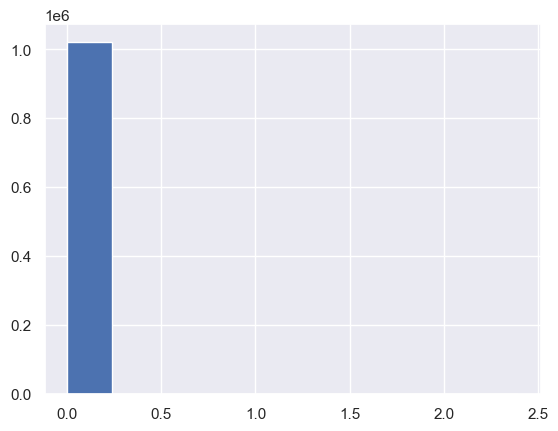

In [75]:
plt.hist(train['velocity'])

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

(array([ 53332., 170320., 179509., 167699., 139134., 100218.,  66120.,
         42661.,  28336.,  19540.]),
 array([0.        , 0.00073445, 0.0014689 , 0.00220335, 0.00293779,
        0.00367224, 0.00440669, 0.00514114, 0.00587559, 0.00661004,
        0.00734449]),
 <BarContainer object of 10 artists>)

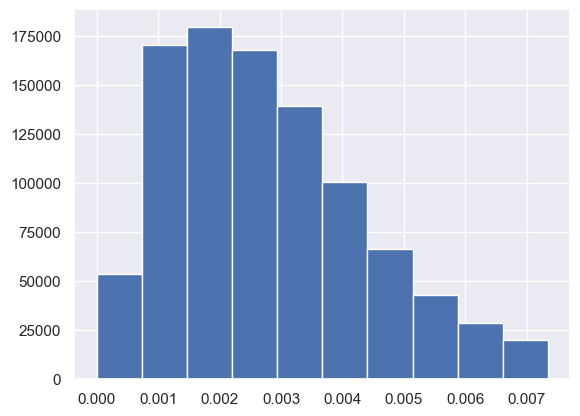

In [76]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tmp = train[train['velocity'] < train['velocity'].mean() + train['velocity'].std()]
plt.hist(tmp['velocity'])

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [77]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tmp = list(list())
tmp.append(train[train['day_of_week'] == 'Monday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Tuesday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Wednesday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Thursday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Friday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Saturday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Sunday'].groupby(['hour']).median().velocity)

C:\Users\User\AppData\Local\Temp\ipykernel_17864\140980250.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp.append(train[train['day_of_week'] == 'Monday'].groupby(['hour']).median().velocity)
C:\Users\User\AppData\Local\Temp\ipykernel_17864\140980250.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp.append(train[train['day_of_week'] == 'Tuesday'].groupby(['hour']).median().velocity)
C:\Users\User\AppData\Local\Temp\ipykernel_17864\140980250.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False

Text(467.25, 0.5, 'day of week')

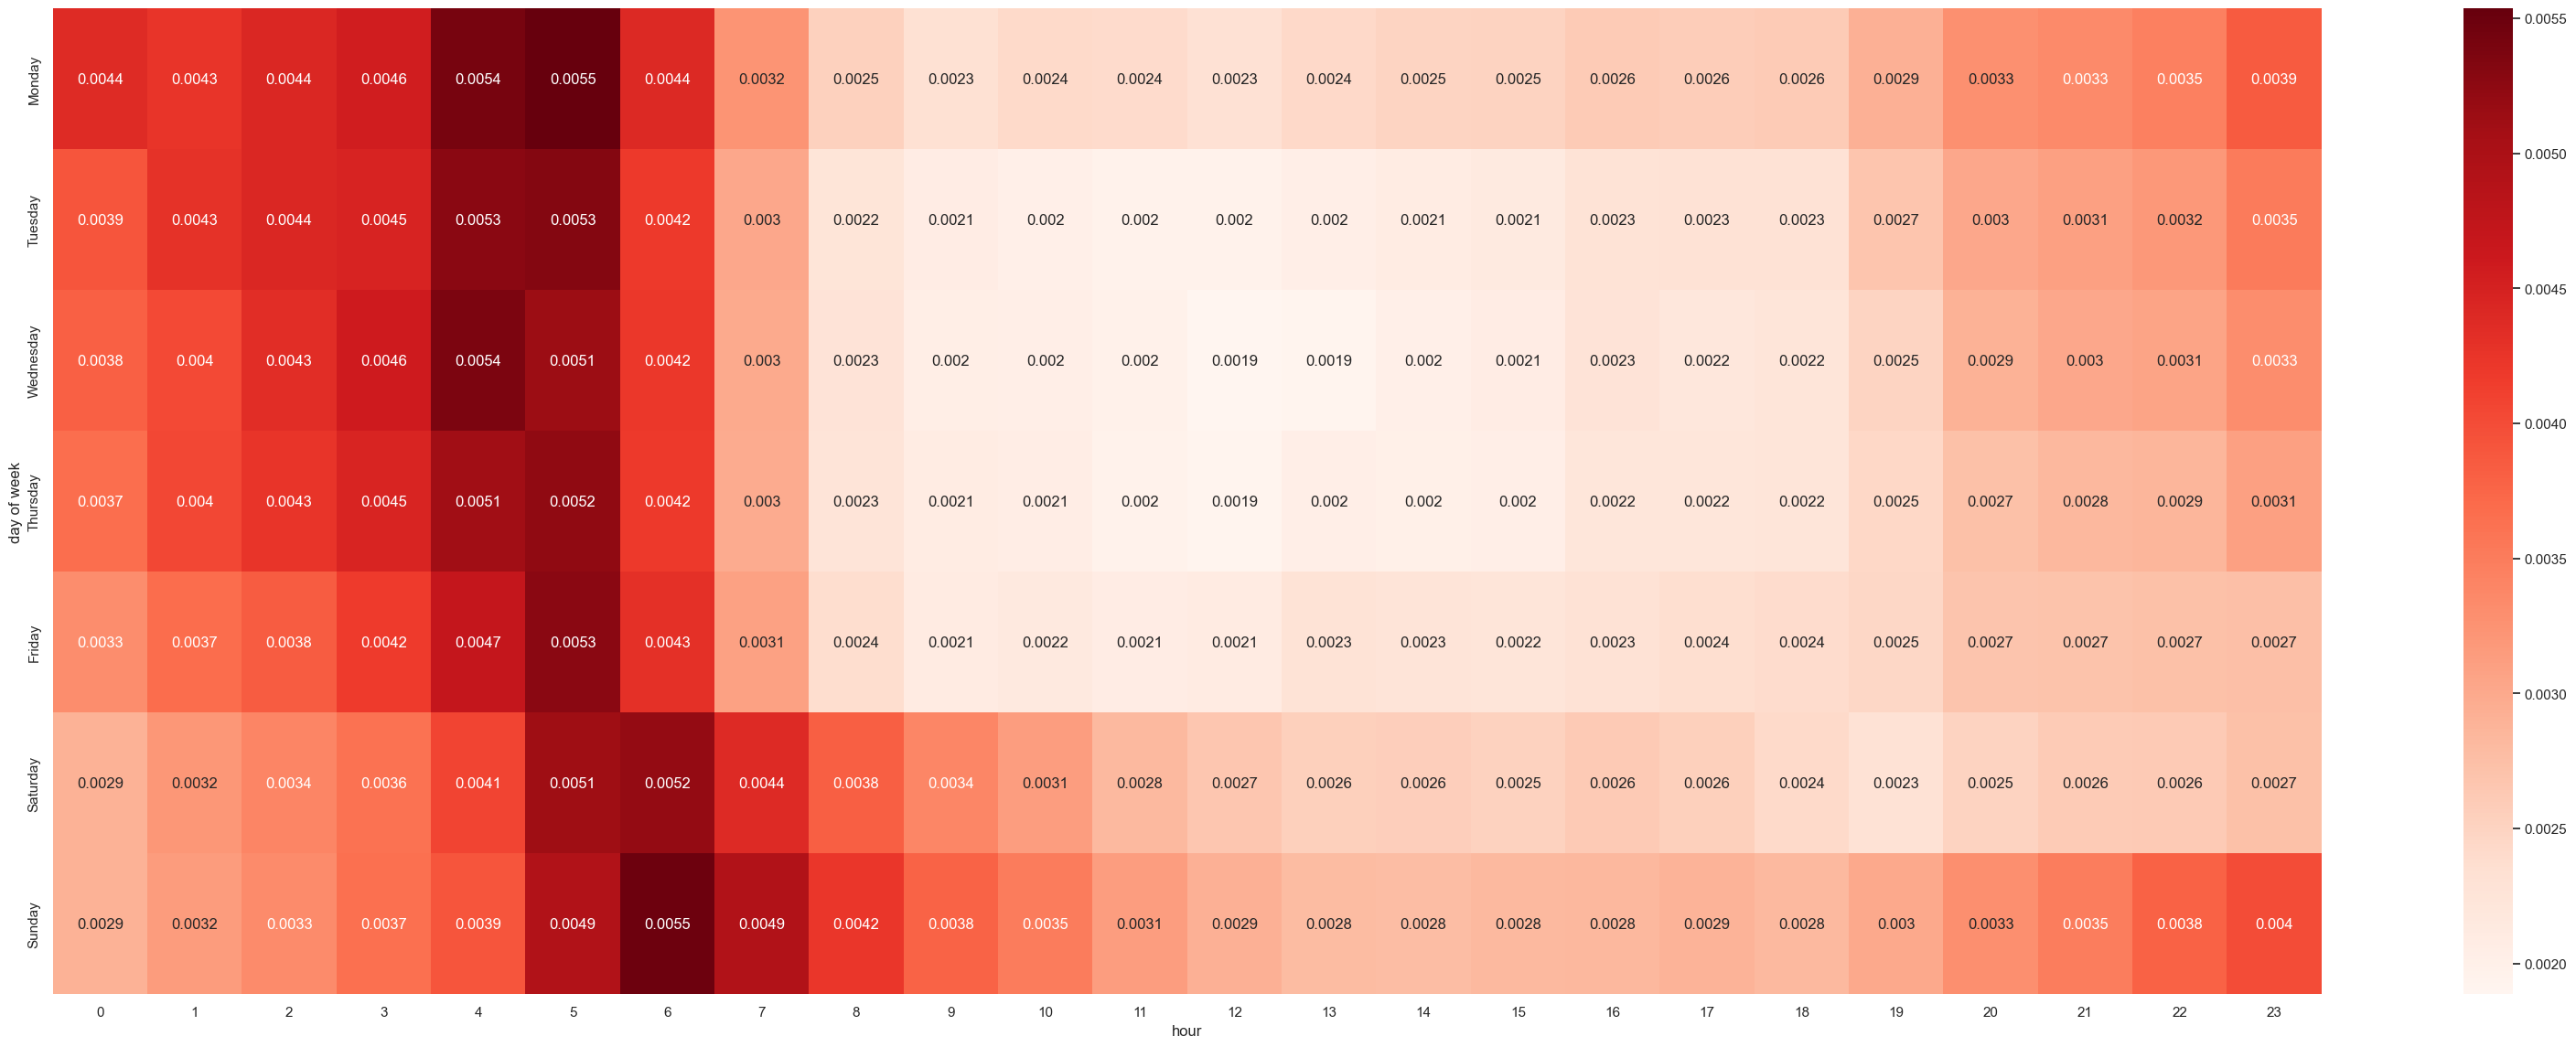

In [79]:
sns.set(rc={'figure.figsize':(40,14)})

plt.xticks(train['hour'].unique())
sns.heatmap(tmp, cmap='Reds', annot=True, yticklabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.xlabel("hour")
plt.ylabel("day of week")

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [80]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train.drop('velocity', inplace = True, axis=1)

test.drop('velocity', inplace = True, axis=1)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [81]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['is_slow'] = 0
train.loc[(train['hour'] > 13) & (train['hour'] < 22) & (train['day_of_week'] != 'Saturday'), 'is_slow'] = 1
train.loc[((train['hour'] > 8) & (train['hour'] < 19) & (train['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))), 'is_slow'] = 1

test['is_slow'] = 0
test.loc[(test['hour'] > 13) & (test['hour'] < 22) & (test['day_of_week'] != 'Saturday'), 'is_slow'] = 1
test.loc[((test['hour'] > 8) & (test['hour'] < 19) & (test['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))), 'is_slow'] = 1

**Задание 8**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [82]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['airport_start'] = 0
train['airport_finish'] = 0

test['airport_start'] = 0
test['airport_finish'] = 0

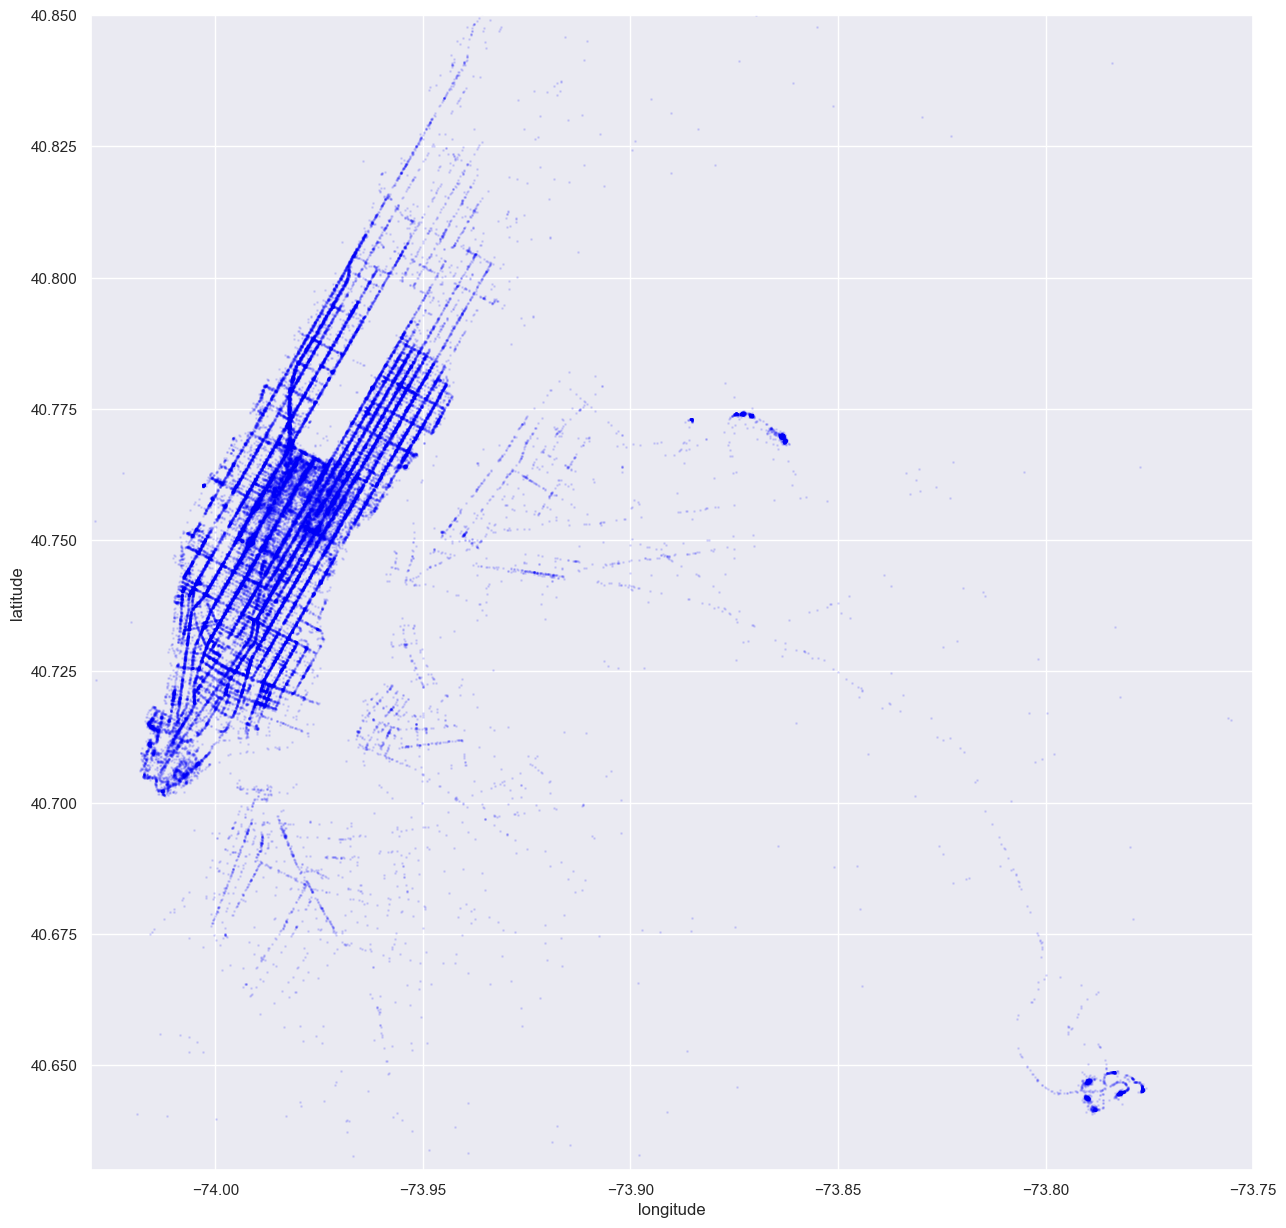

In [84]:
N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

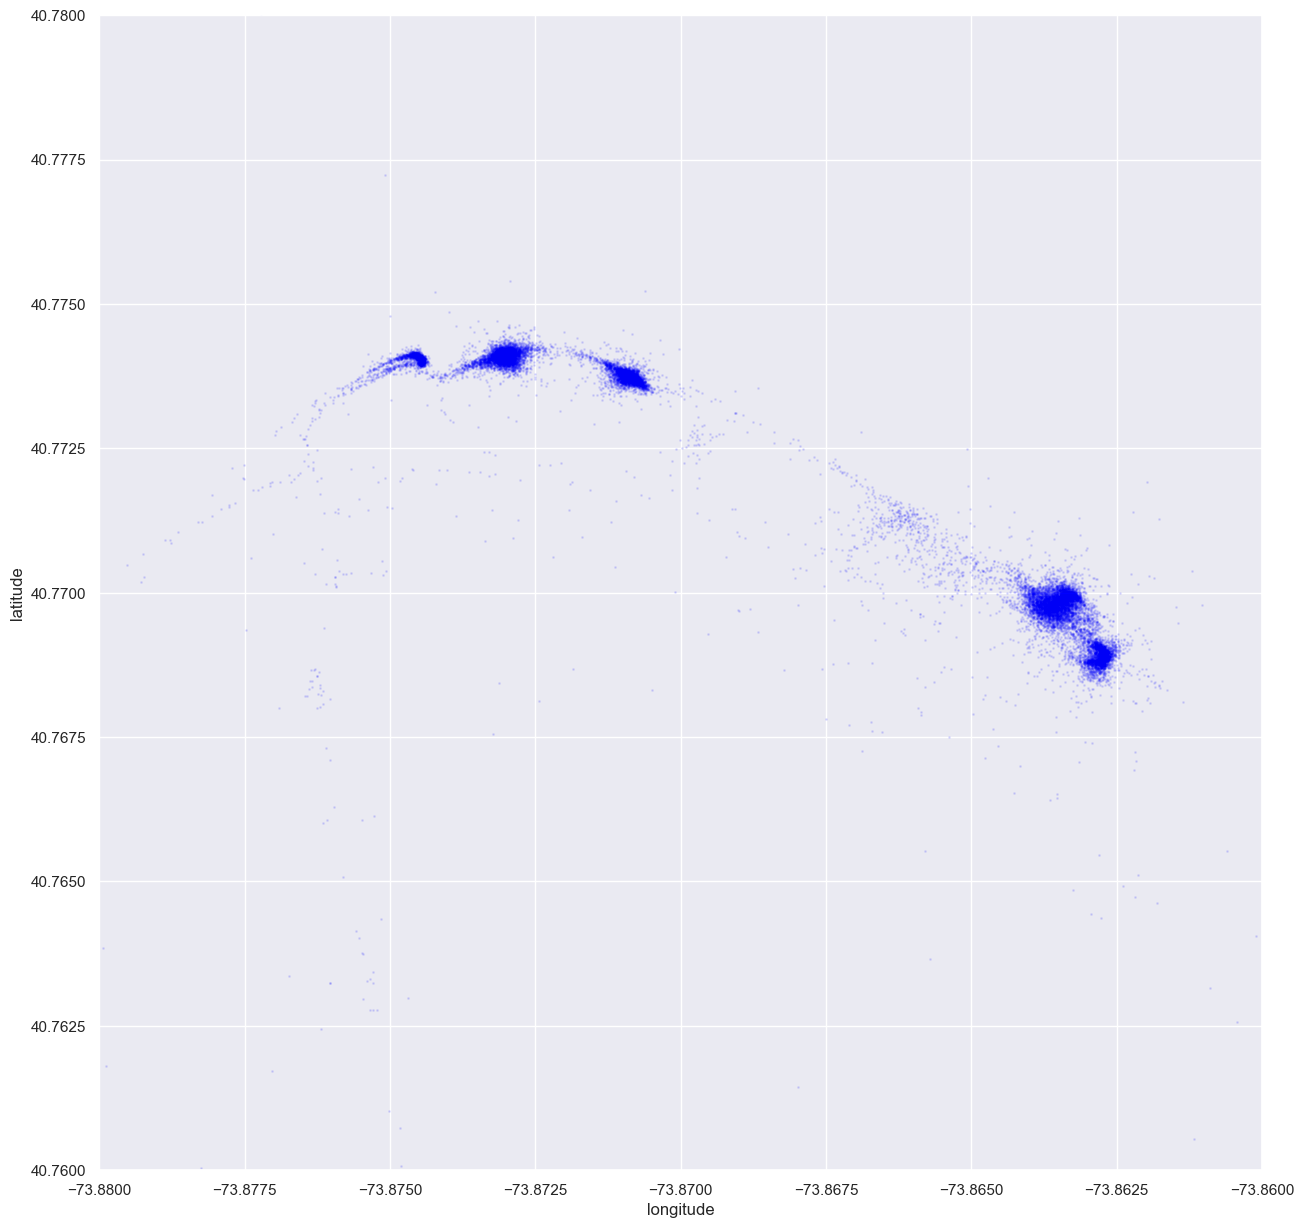

In [86]:
# 1й 
N = 1000000
city_long_border = (-73.88, -73.86)
city_lat_border = (40.76, 40.78)

plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

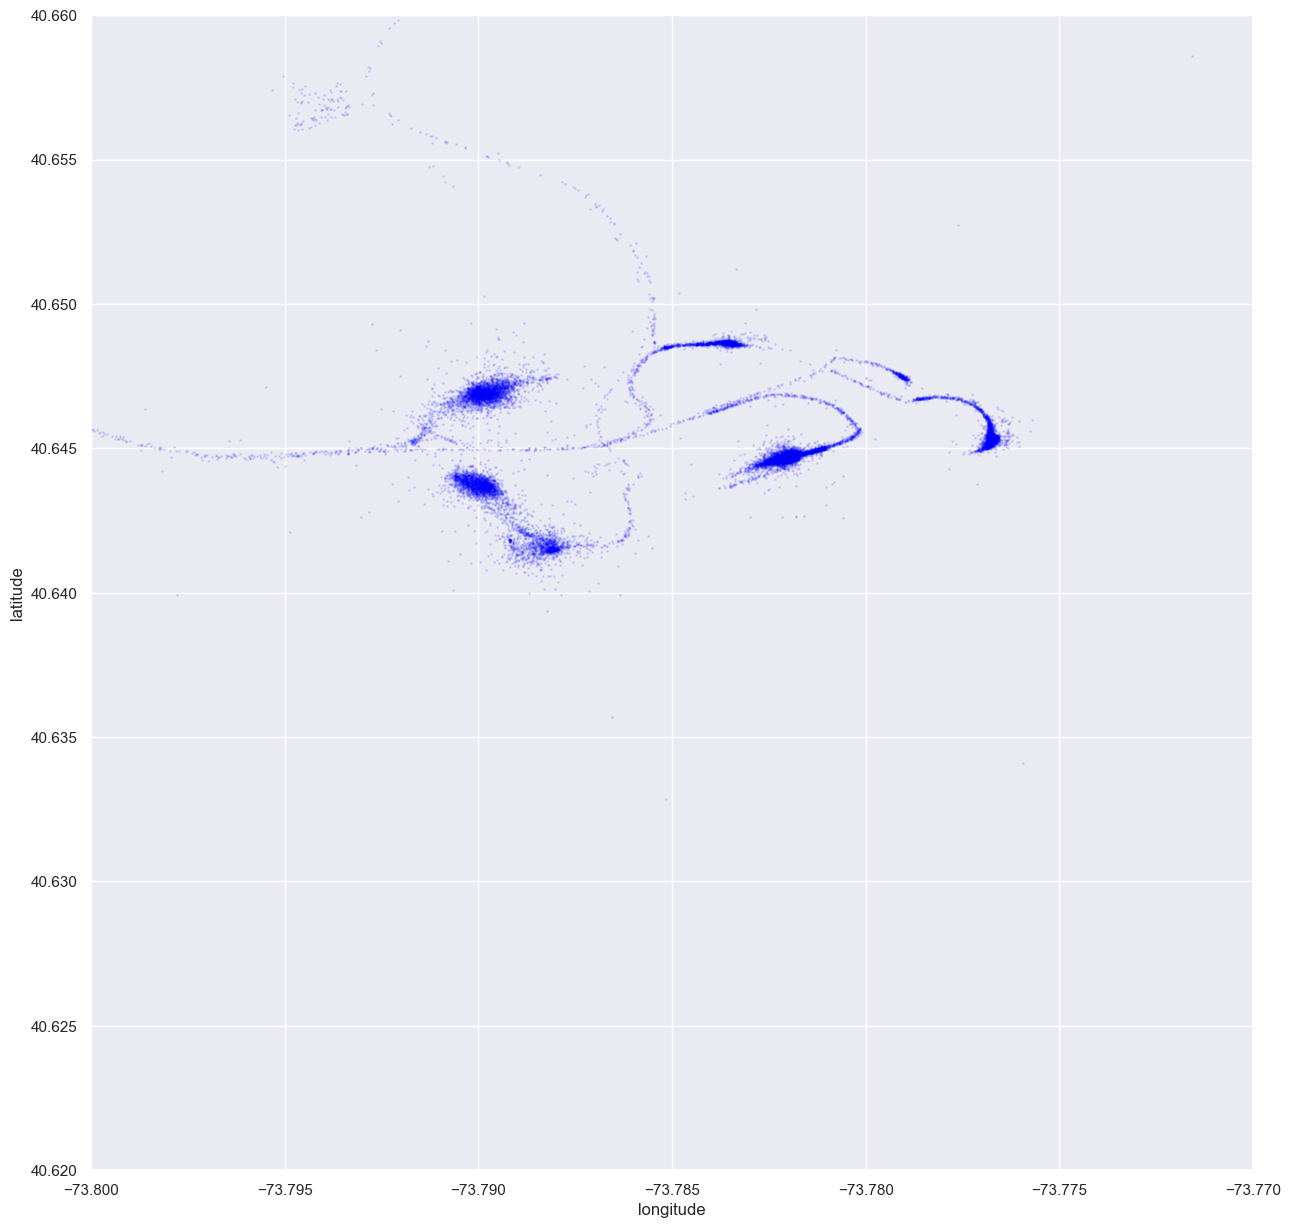

In [88]:
#2
N = 1000000
city_long_border = (-73.8, -73.77)
city_lat_border = (40.62, 40.66)

plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [89]:
def f1(lat,lon):
    return ((40.62 < df_train[lat]) & (df_train[lat] < 40.66) & (-73.8 < df_train[lon]) & (df_train[lon] < -73.77))
  
def f2(lat,lon):
    return ((40.76 < df_train[lat]) & (df_train[lat] < 40.78) & (-73.88 < df_train[lon]) & (df_train[lon] < -73.86))

In [90]:
train.loc[(f1('pickup_latitude','pickup_longitude')), 'airport_start'] = 1
train.loc[(f2('pickup_latitude','pickup_longitude')), 'airport_start'] = 2

train.loc[(f1('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 1
train.loc[(f2('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 2

test.loc[(f1('pickup_latitude','pickup_longitude')), 'airport_start'] = 1
test.loc[(f2('pickup_latitude','pickup_longitude')), 'airport_start'] = 2

test.loc[(f1('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 1
test.loc[(f2('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 2

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

<AxesSubplot: xlabel='airport_start', ylabel='log_trip_duration'>

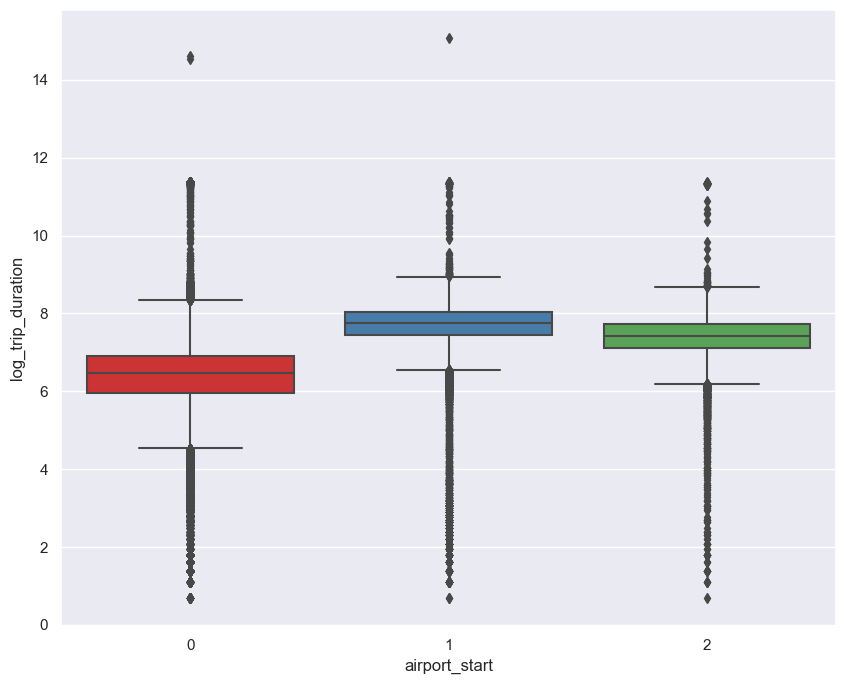

In [97]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x=train['airport_start'], y=train['log_trip_duration'], palette="Set1")

<AxesSubplot: ylabel='log_trip_duration'>

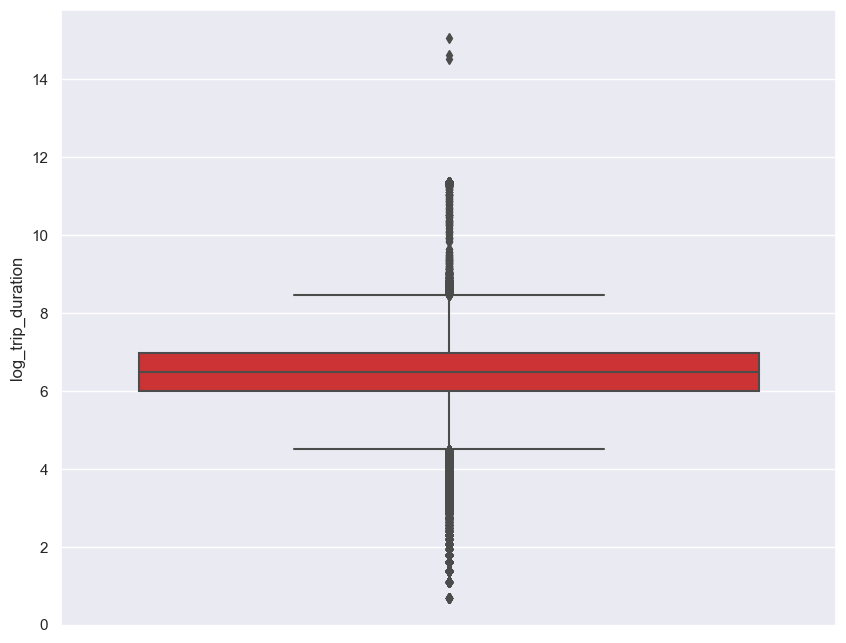

In [98]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(train['airport_finish'], y=train['log_trip_duration'], palette="Set1")

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    #def __init__(self, ...):
    #    pass
    
    def show_map(self, X=None):
        pass
      
    def fit(self, X=None, y=None):
        # your code here
        self.X = X.copy()

        self.X['grid_first'] = -1
        self.X['grid_second'] = -1

        # да, это выглядит страшно, но я разбила на квадратики руками (12 квадратиков)

        self.mask_of_square1_f = [((self.X['pickup_latitude'] > 40.79) & (self.X['pickup_latitude'] < 40.82) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square1_s = [((self.X['dropoff_latitude'] > 40.79) & (self.X['dropoff_latitude'] < 40.82) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square2_f = [((self.X['pickup_latitude'] > 40.79) & (self.X['pickup_latitude'] < 40.82) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square2_s = [((self.X['dropoff_latitude'] > 40.79) & (self.X['dropoff_latitude'] < 40.82) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square3_f = [((self.X['pickup_latitude'] > 40.79) & (self.X['pickup_latitude'] < 40.82) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square3_s = [((self.X['dropoff_latitude'] > 40.79) & (self.X['dropoff_latitude'] < 40.82) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        self.mask_of_square4_f = [((self.X['pickup_latitude'] > 40.76) & (self.X['pickup_latitude'] <= 40.79) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square4_s = [((self.X['dropoff_latitude'] > 40.76) & (self.X['dropoff_latitude'] <= 40.79) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square5_f = [((self.X['pickup_latitude'] > 40.76) & (self.X['pickup_latitude'] <= 40.79) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square5_s = [((self.X['dropoff_latitude'] > 40.76) & (self.X['dropoff_latitude'] <= 40.79) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square6_f = [((self.X['pickup_latitude'] > 40.76) & (self.X['pickup_latitude'] <= 40.79) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square6_s = [((self.X['dropoff_latitude'] > 40.76) & (self.X['dropoff_latitude'] <= 40.79) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        self.mask_of_square7_f = [((self.X['pickup_latitude'] > 40.73) & (self.X['pickup_latitude'] <= 40.76) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square7_s = [((self.X['dropoff_latitude'] > 40.73) & (self.X['dropoff_latitude'] <= 40.76) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square8_f = [((self.X['pickup_latitude'] > 40.73) & (self.X['pickup_latitude'] <= 40.76) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square8_s = [((self.X['dropoff_latitude'] > 40.73) & (self.X['dropoff_latitude'] <= 40.76) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square9_f = [((self.X['pickup_latitude'] > 40.73) & (self.X['pickup_latitude'] <= 40.76) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square9_s = [((self.X['dropoff_latitude'] > 40.73) & (self.X['dropoff_latitude'] <= 40.76) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        self.mask_of_square10_f = [((self.X['pickup_latitude'] > 40.70) & (self.X['pickup_latitude'] <= 40.73) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square10_s = [((self.X['dropoff_latitude'] > 40.70) & (self.X['dropoff_latitude'] <= 40.73) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square11_f = [((self.X['pickup_latitude'] > 40.70) & (self.X['pickup_latitude'] <= 40.73) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square11_s = [((self.X['dropoff_latitude'] > 40.70) & (self.X['dropoff_latitude'] <= 40.73) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square12_f = [((self.X['pickup_latitude'] > 40.70) & (self.X['pickup_latitude'] <= 40.73) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square12_s = [((self.X['dropoff_latitude'] > 40.70) & (self.X['dropoff_latitude'] <= 40.73) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        return self

    def transform(self, X, y=None):
        # your code here
        tmp = self.X[self.mask_of_square1_f[0]].copy()
        self.X.loc[self.mask_of_square1_f[0], ['grid_first']] = 1
        tmp = self.X[self.mask_of_square1_s[0]].copy()
        self.X.loc[self.mask_of_square1_s[0], ['grid_second']] = 1

        tmp = self.X[self.mask_of_square2_f[0]].copy()
        self.X.loc[self.mask_of_square2_f[0], ['grid_first']] = 2
        tmp = self.X[self.mask_of_square2_s[0]].copy()
        self.X.loc[self.mask_of_square2_s[0], ['grid_second']] = 2

        tmp = self.X[self.mask_of_square3_f[0]].copy()
        self.X.loc[self.mask_of_square3_f[0], ['grid_first']] = 3
        tmp = self.X[self.mask_of_square3_s[0]].copy()
        self.X.loc[self.mask_of_square3_s[0], ['grid_second']] = 3

        tmp = self.X[self.mask_of_square4_f[0]].copy()
        self.X.loc[self.mask_of_square4_f[0], ['grid_first']] = 4
        tmp = self.X[self.mask_of_square4_s[0]].copy()
        self.X.loc[self.mask_of_square4_s[0], ['grid_second']] = 4

        tmp = self.X[self.mask_of_square5_f[0]].copy()
        self.X.loc[self.mask_of_square5_f[0], ['grid_first']] = 5
        tmp = self.X[self.mask_of_square5_s[0]].copy()
        self.X.loc[self.mask_of_square5_s[0], ['grid_second']] = 5

        tmp = self.X[self.mask_of_square6_f[0]].copy()
        self.X.loc[self.mask_of_square6_f[0], ['grid_first']] = 6
        tmp = self.X[self.mask_of_square6_s[0]].copy()
        self.X.loc[self.mask_of_square6_s[0], ['grid_second']] = 6

        tmp = self.X[self.mask_of_square7_f[0]].copy()
        self.X.loc[self.mask_of_square7_f[0], ['grid_first']] = 7
        tmp = self.X[self.mask_of_square7_s[0]].copy()
        self.X.loc[self.mask_of_square7_s[0], ['grid_second']] = 7

        tmp = self.X[self.mask_of_square8_f[0]].copy()
        self.X.loc[self.mask_of_square8_f[0], ['grid_first']] = 8
        tmp = self.X[self.mask_of_square8_s[0]].copy()
        self.X.loc[self.mask_of_square8_s[0], ['grid_second']] = 8

        tmp = self.X[self.mask_of_square9_f[0]].copy()
        self.X.loc[self.mask_of_square9_f[0], ['grid_first']] = 9
        tmp = self.X[self.mask_of_square9_s[0]].copy()
        self.X.loc[self.mask_of_square9_s[0], ['grid_second']] = 9

        tmp = self.X[self.mask_of_square9_f[0]].copy()
        self.X.loc[self.mask_of_square9_f[0], ['grid_first']] = 10
        tmp = self.X[self.mask_of_square9_s[0]].copy()
        self.X.loc[self.mask_of_square9_s[0], ['grid_second']] = 10

        tmp = self.X[self.mask_of_square11_f[0]].copy()
        self.X.loc[self.mask_of_square11_f[0], ['grid_first']] = 11
        tmp = self.X[self.mask_of_square11_s[0]].copy()
        self.X.loc[self.mask_of_square11_s[0], ['grid_second']] = 11

        tmp = self.X[self.mask_of_square12_f[0]].copy()
        self.X.loc[self.mask_of_square12_f[0], ['grid_first']] = 12
        tmp = self.X[self.mask_of_square12_s[0]].copy()
        self.X.loc[self.mask_of_square12_s[0], ['grid_second']] = 12

        return self.X

In [100]:
grid1 = MapGridTransformer()
grid1.fit(train)
add_train = grid1.transform(train)

grid2 = MapGridTransformer()
grid2.fit(test)
add_test = grid2.transform(test)

In [101]:
train['grid_first'] = add_train['grid_first']
train['grid_second'] = add_train['grid_second']

test['grid_first'] = add_test['grid_first']
test['grid_second'] = add_test['grid_second']

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [102]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week', 'month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week', 'month', 'is_bad', 'log_haversine',  'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [103]:
notnum_feats = ['hour', 'day_of_week', 'month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5498
Test MSE = 0.3023
Train RMSE = 0.5481
Train MSE = 0.3004


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [104]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('count of unique values:')
print('vendor_id:', train['vendor_id'].unique().shape[0])
print('passenger_count:', train['passenger_count'].unique().shape[0])
print('store_and_fwd_flag:', train['store_and_fwd_flag'].unique().shape[0])

count of unique values:
vendor_id: 2
passenger_count: 9
store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<AxesSubplot: xlabel='vendor_id', ylabel='log_trip_duration'>

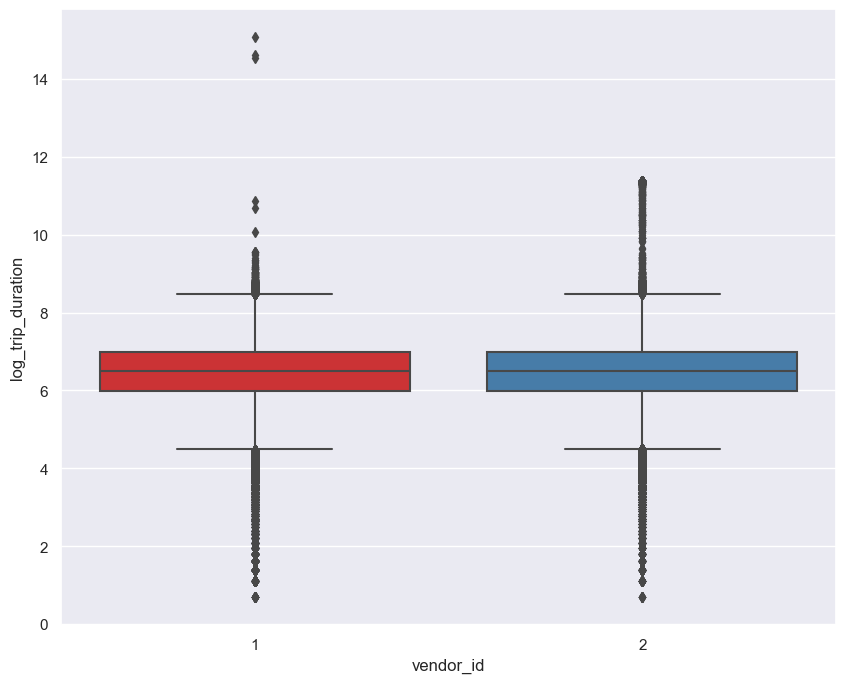

In [105]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.boxplot(y = train['log_trip_duration'], palette="Set1", data = train, x = train['vendor_id'])

<AxesSubplot: xlabel='passenger_count', ylabel='log_trip_duration'>

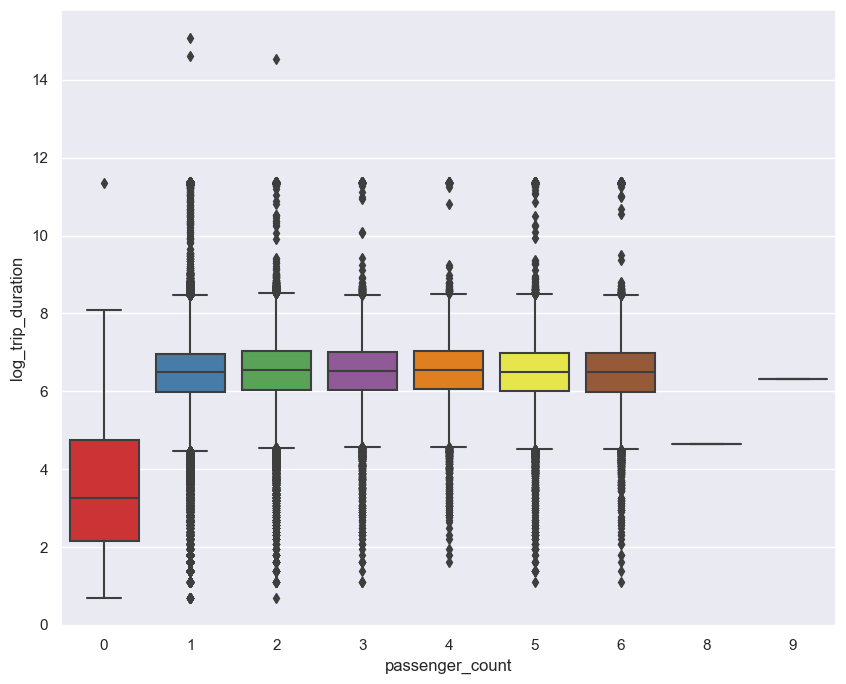

In [108]:
sns.boxplot(y = train['log_trip_duration'], palette="Set1", data = train, x = train['passenger_count'])

<AxesSubplot: xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

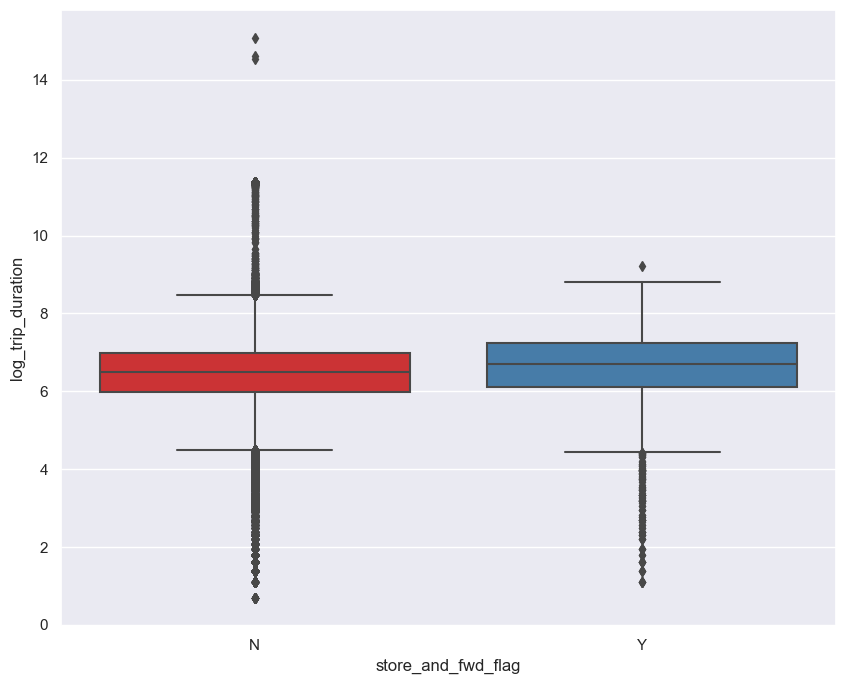

In [109]:
sns.boxplot(y = train['log_trip_duration'], palette="Set1", data = train, x = train['store_and_fwd_flag'])

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [110]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['vendor_id'] = train['vendor_id'].replace({1 : 0, 2 : 1})
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].replace({'N' : 0, 'Y' : 1})

test['vendor_id'] = test['vendor_id'].replace({1 : 0, 2 : 1})
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].replace({'N' : 0, 'Y' : 1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [111]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week', 'month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week', 'month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [112]:
notnum_feats = ['hour', 'day_of_week', 'month', 'airport_start', 'airport_finish', 'grid_first', 'vendor_id', 'grid_second', 'store_and_fwd_flag']
num_feats = ['day_of_year', 'passenger_count', 'is_bad', 'is_slow', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5496
Test MSE = 0.3020
Train RMSE = 0.5479
Train MSE = 0.3002


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель

**Задание 13**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [113]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [125]:
notnum_feats = ['hour', 'day_of_week', 'month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5765
Test MSE = 0.3324
Train RMSE = 0.5136
Train MSE = 0.2638


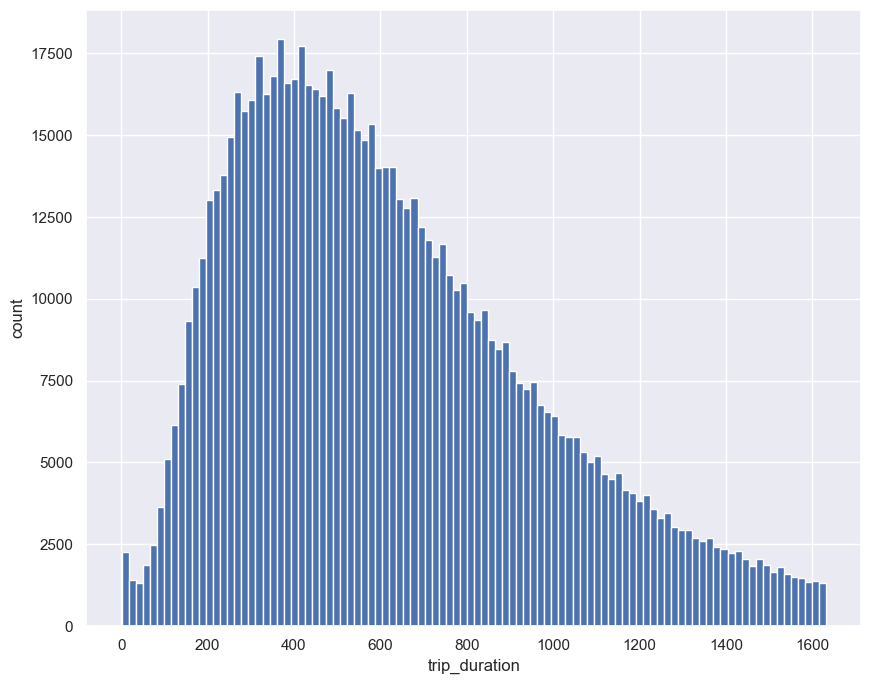

In [127]:
plt.hist(train['trip_duration'], bins=100)
plt.xlabel('trip_duration')
plt.ylabel('count')
plt.show()

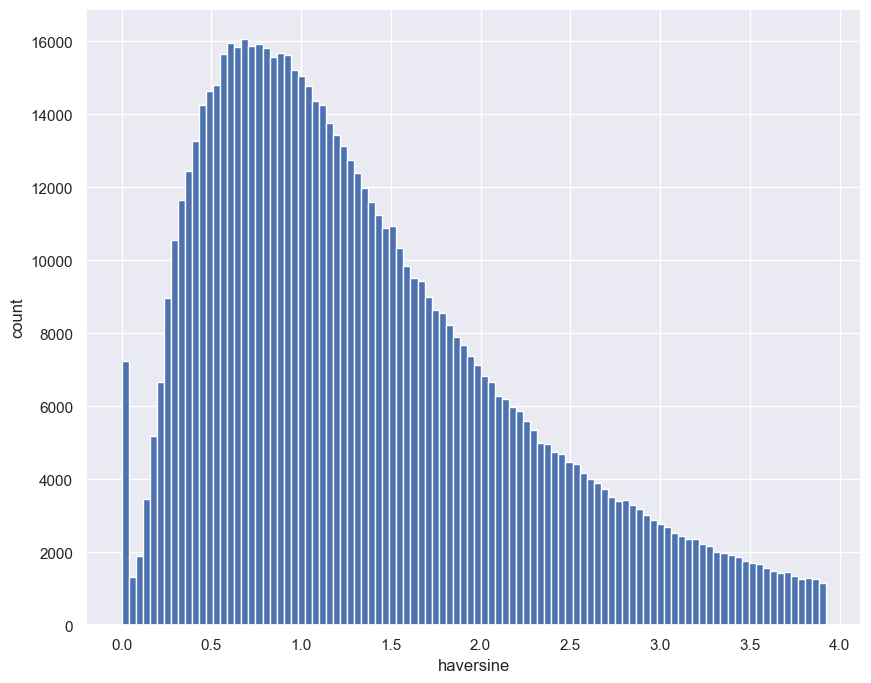

In [131]:
plt.hist(train['haversine'], bins=100)
plt.xlabel('haversine')
plt.ylabel('count')
plt.show()

In [132]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [133]:
notnum_feats = ['hour', 'day_of_week', 'month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5745
Test MSE = 0.3301
Train RMSE = 0.4900
Train MSE = 0.2401


C:\Users\User\AppData\Local\Temp\ipykernel_17864\2165858811.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


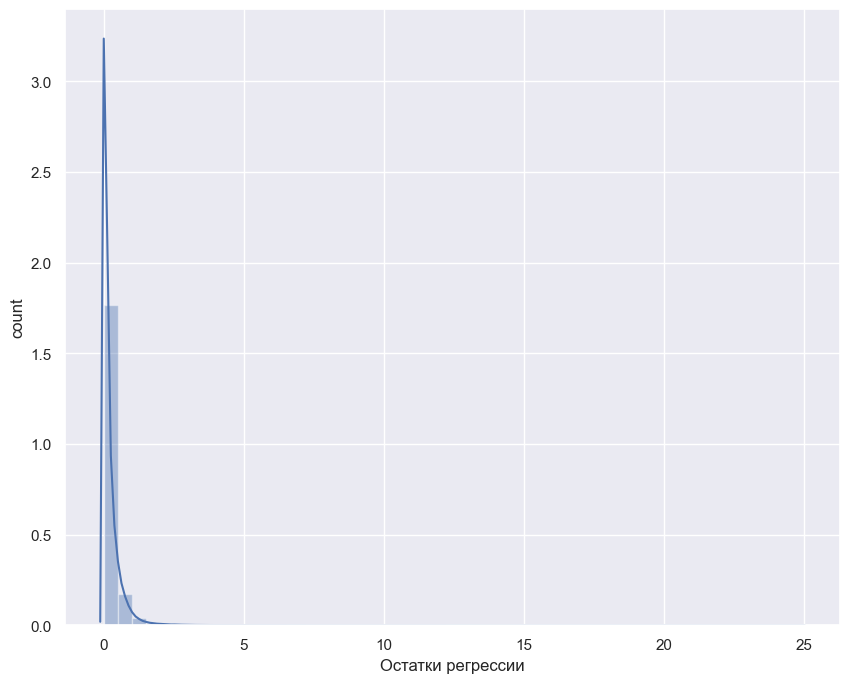

In [134]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)
plt.xlabel('Остатки регрессии')
plt.ylabel('count')
plt.show()

In [135]:
mask = ((error < np.quantile(error, 0.90)))

In [136]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5759
Test MSE = 0.3317
Train RMSE = 0.4918
Train MSE = 0.2419


C:\Users\User\AppData\Local\Temp\ipykernel_17864\1036739615.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<AxesSubplot: xlabel='log_trip_duration', ylabel='Density'>

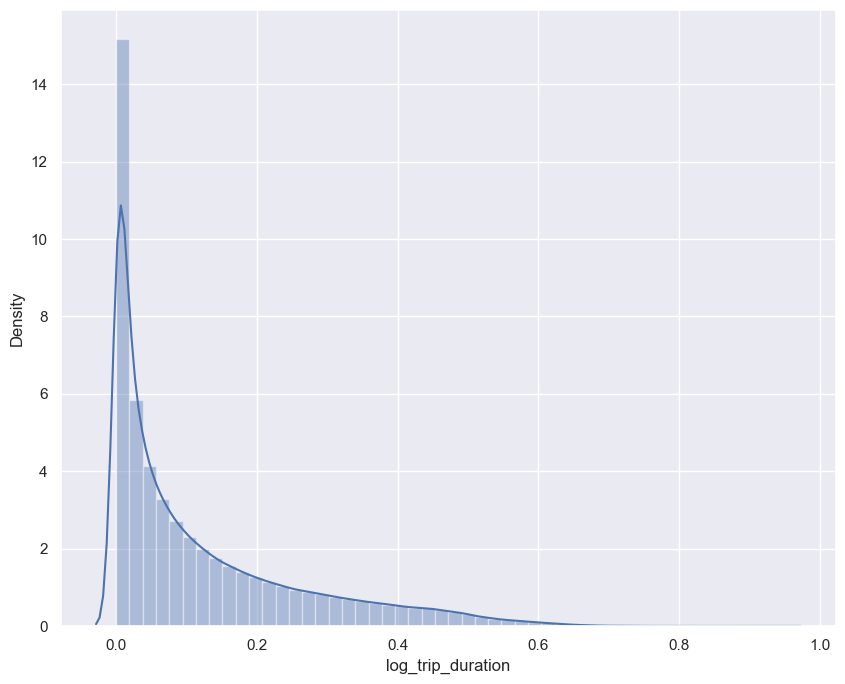

In [137]:
error = (y_train[mask] - model.predict(X_train[mask])) ** 2
sns.distplot(error)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [139]:
notnum_feats

['hour',
 'day_of_week',
 'month',
 'airport_start',
 'airport_finish',
 'grid_first',
 'grid_second']

In [140]:
train.loc[train['airport_start'] == 2, 'airport_start'] = 1

test.loc[test['airport_start'] == 2, 'airport_start'] = 1

train.loc[train['airport_finish'] == 2, 'airport_finish'] = 1

test.loc[test['airport_finish'] == 2, 'airport_finish'] = 1

In [141]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [142]:
notnum_feats = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad', 'airport_start', 'airport_finish']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5717
Test MSE = 0.3269
Train RMSE = 0.4908
Train MSE = 0.2409


In [143]:
error = (y_train - model.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.90))

In [144]:
notnum_feats = ['hour', 'day_of_week', 'month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
X_train = X_train[mask]
y_train = y_train[mask]

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5724
Test MSE = 0.3277
Train RMSE = 0.3477
Train MSE = 0.1209


In [145]:
train['airport'] = train['airport_start'] | train['airport_finish']

test['airport'] = test['airport_start'] | test['airport_finish']

In [146]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [147]:
notnum_feats = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad', 'airport']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5608
Test MSE = 0.3145
Train RMSE = 0.4928
Train MSE = 0.2428


In [148]:
error = (y_train - model.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.90))

In [149]:
notnum_feats = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad', 'airport']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

X_train = X_train[mask]
y_train = y_train[mask]

Test RMSE = 0.5578
Test MSE = 0.3112
Train RMSE = 0.4951
Train MSE = 0.2451


**Задание 14**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [150]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']
print("Size before OneHot:", X_train.shape)
print("Size after  OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (744294, 10)
Size after  OneHot: (744294, 66)


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [151]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.8619
Test MSE = 0.7429
Train RMSE = 0.6232
Train MSE = 0.3884


In [152]:
error = (y_train - model.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.90))

X_train = X_train[mask]
y_train = y_train[mask]

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [153]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train, val = train_test_split(train, test_size=0.2)

In [154]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
X_val = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_val = test['log_trip_duration']

In [155]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
     ('ohe_and_scaling', column_transformer),
     ('regression', Ridge())
 ])

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha1 = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha1)

Best alpha = 1.2743


In [156]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha1))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5611
Test MSE = 0.3148
Train RMSE = 0.4916
Train MSE = 0.2417


In [157]:
from sklearn.model_selection import GridSearchCV

lasso_pipeline = Pipeline(steps=[
      ('ohe_and_scaling', column_transformer),
      ('regression', Lasso())
  ])

alphas = np.logspace(-4, 3, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha_lasso1 = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha_lasso1)

Best alpha = 0.0001


In [158]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha_lasso1))
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5612
Test MSE = 0.3149
Train RMSE = 0.4916
Train MSE = 0.2417


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [159]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
count_of_zs = pd.DataFrame()
count_of_zs['alpha'] = np.nan
count_of_zs['count'] = np.nan
for alpha in np.logspace(-4, 3, 20):
  column_transformer = ColumnTransformer([
      ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
      ('scaling', StandardScaler(), num_feats)
  ])

  lasso_pipeline = Pipeline(steps=[
      ('ohe_and_scaling', column_transformer),
      ('regression', Lasso(alpha))
  ])

  model = lasso_pipeline.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  to_add = {'alpha' : alpha, 'count' : sum(model.named_steps['regression'].coef_==0)}

  count_of_zs = count_of_zs.append(to_add, ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17864\128175242.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_of_zs = count_of_zs.append(to_add, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17864\128175242.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_of_zs = count_of_zs.append(to_add, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17864\128175242.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_of_zs = count_of_zs.append(to_add, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17864\128175242.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_of_zs = co

Text(16.694444444444443, 0.5, 'count')

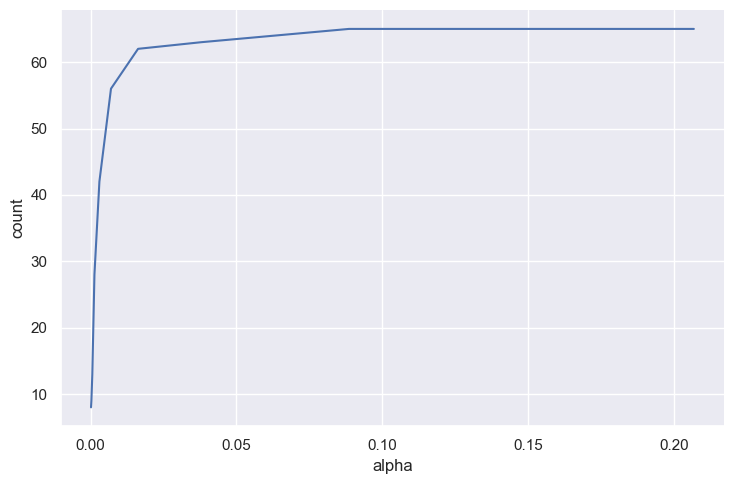

In [160]:
x = count_of_zs['alpha'].head(10)
y = count_of_zs['count'].head(10)

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('alpha')
plt.ylabel('count')

In [161]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha_lasso1))
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.square(mean_squared_error(y_test, y_pred)))

0.09918291876518653


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [162]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['top100'] = -1
train['route'] = train['grid_first'].astype(str) + ', ' + train['grid_second'].astype(str)

test['top100'] = -1
test['route'] = test['grid_first'].astype(str) + ', ' + test['grid_second'].astype(str)

In [163]:
komb_grid = train[(train['route'] != 'nan, nan') & (train['route'] != '-1, -1')].groupby(['route']).count().sort_values('id').tail(100)

In [164]:
train.loc[train['route'].isin(komb_grid.index), 'top100'] = train['route']

test.loc[test['route'].isin(komb_grid.index), 'top100'] = test['route']

In [165]:
train['top100'] = train['top100'].astype(str)

test['top100'] = test['top100'].astype(str)

le = LabelEncoder()
train['top100'] = le.fit_transform(train['top100'])
test['top100'] = le.fit_transform(test['top100'])

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [166]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second', 'top100']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second', 'top100']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [167]:
notnum_feats = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second', 'top100']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad', 'airport']

In [168]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5361
Test MSE = 0.2874
Train RMSE = 0.4726
Train MSE = 0.2233


In [169]:
error = (y_train - model.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.90))

In [170]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5323
Test MSE = 0.2833
Train RMSE = 0.4748
Train MSE = 0.2254


In [1]:
train.drop('route', axis=1,inplace=True)

test.drop('route', axis=1,inplace=True)

NameError: name 'train' is not defined